<a href="https://colab.research.google.com/github/rubensuarez22/Regression-Trees-and-Ensemble-Learning/blob/main/Regression_Trees_and_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Decision
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Random Forest
from sklearn.ensemble import RandomForestRegressor
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
#XGBoost
import xgboost as xgb
#GridSearch
from sklearn.model_selection import GridSearchCV



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


## Display the first few rows of the dataset

In [3]:
df = pd.read_csv(path + "/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Descriptive Statistics and Data Overview

### Number of rows and columns

In [4]:
print(df.shape)

(545, 13)


### Summary statistics for numerical features

In [5]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


### Data types and non-null counts

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


### Look for duplicate rows

In [7]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


### Column names

In [8]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


### Check for missing values

In [9]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### Unique values in each column

In [10]:
print(df.nunique())

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


# Visualization

### Pair Plot and Heatmap to understand feature relationships.

### Categorical data visualization

In [11]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']
for x in categorical_list: print(x)


mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


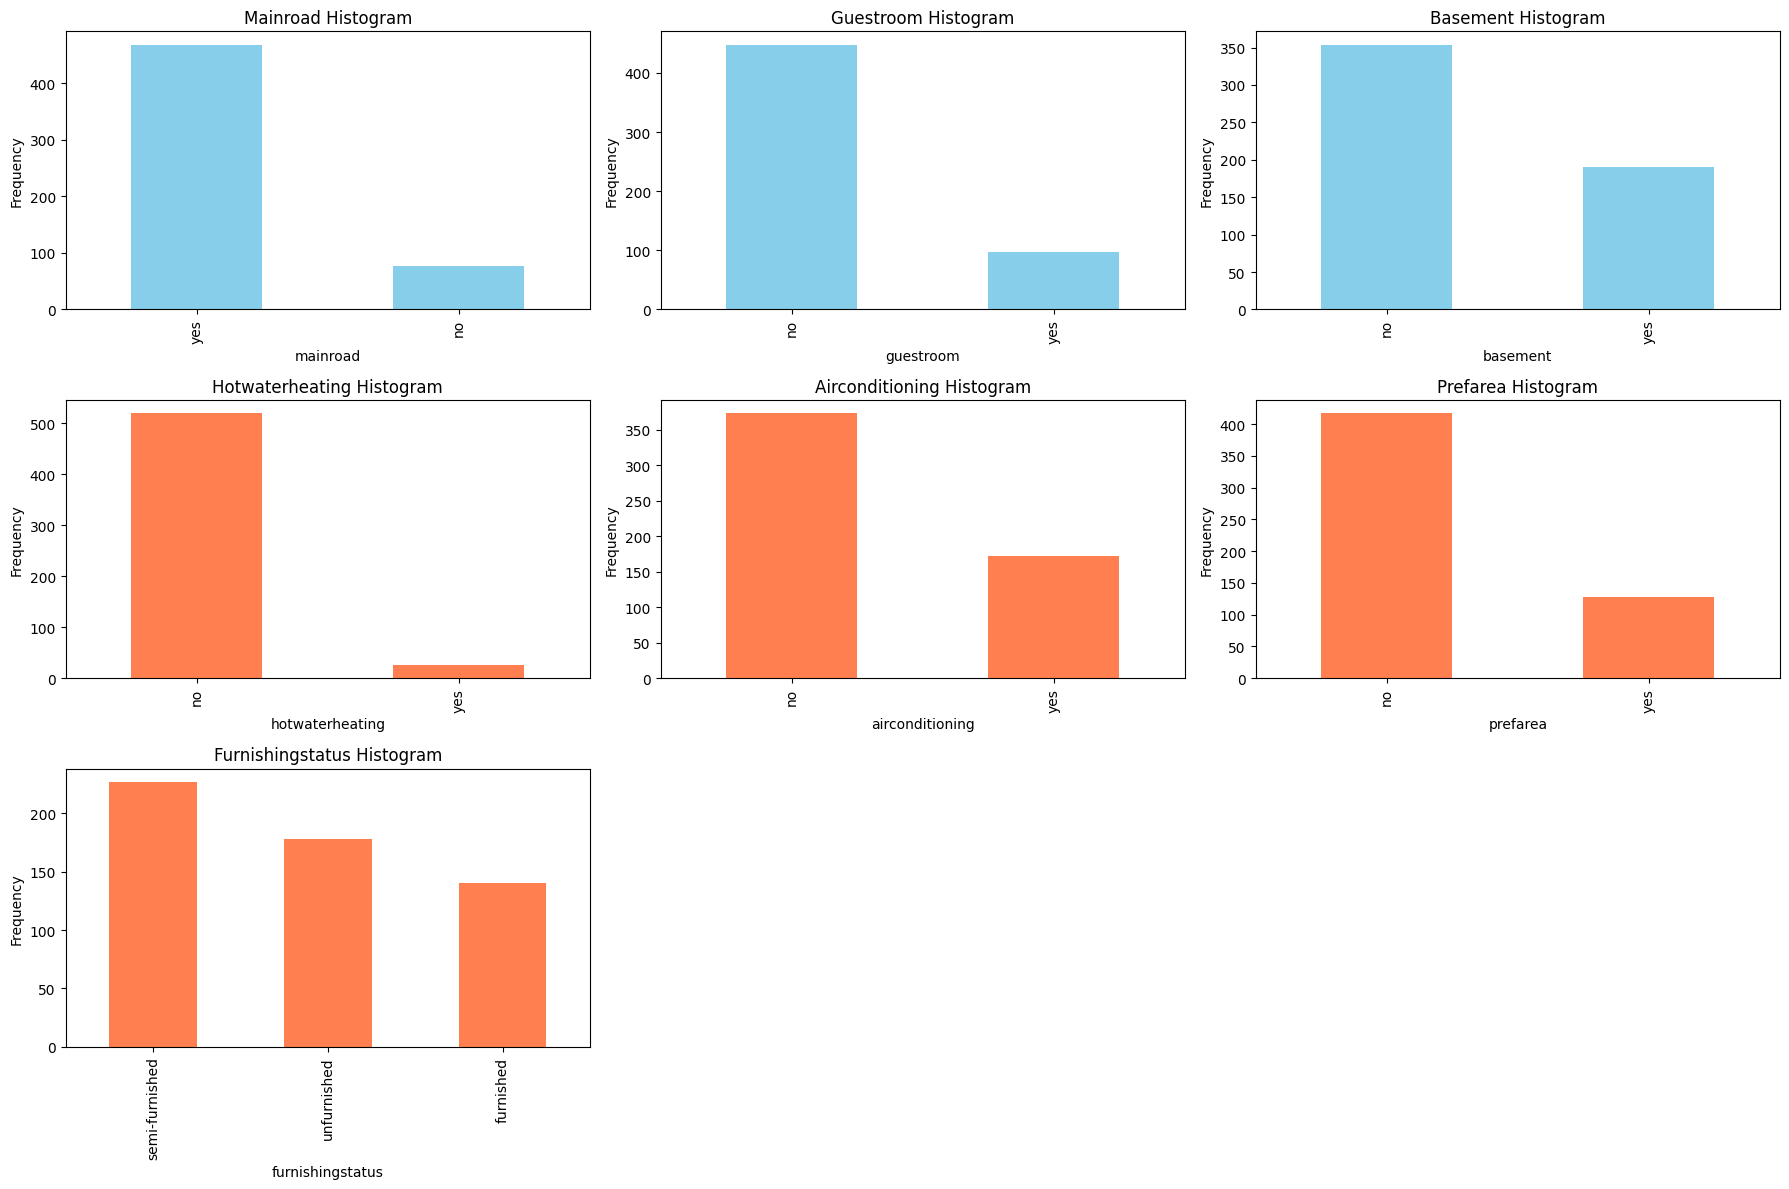

In [12]:
# Combining all categorical histograms in one figure

plt.figure(figsize=(18, 12))

# Plotting each categorical variable in a subplot
plt.subplot(3, 3, 1)
plt1 = df['mainroad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Mainroad Histogram')
plt1.set(xlabel='mainroad', ylabel='Frequency')

plt.subplot(3, 3, 2)
plt2 = df['guestroom'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Guestroom Histogram')
plt2.set(xlabel='guestroom', ylabel='Frequency')

plt.subplot(3, 3, 3)
plt3 = df['basement'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Basement Histogram')
plt3.set(xlabel='basement', ylabel='Frequency')

plt.subplot(3, 3, 4)
plt4 = df['hotwaterheating'].value_counts().plot(kind='bar', color='coral')
plt.title('Hotwaterheating Histogram')
plt4.set(xlabel='hotwaterheating', ylabel='Frequency')

plt.subplot(3, 3, 5)
plt5 = df['airconditioning'].value_counts().plot(kind='bar', color='coral')
plt.title('Airconditioning Histogram')
plt5.set(xlabel='airconditioning', ylabel='Frequency')

plt.subplot(3, 3, 6)
plt6 = df['prefarea'].value_counts().plot(kind='bar', color='coral')
plt.title('Prefarea Histogram')
plt6.set(xlabel='prefarea', ylabel='Frequency')

plt.subplot(3, 3, 7)
plt7 = df['furnishingstatus'].value_counts().plot(kind='bar', color='coral')
plt.title('Furnishingstatus Histogram')
plt7.set(xlabel='furnishingstatus', ylabel='Frequency')

plt.tight_layout()
plt.show()



### Numerical data visualization

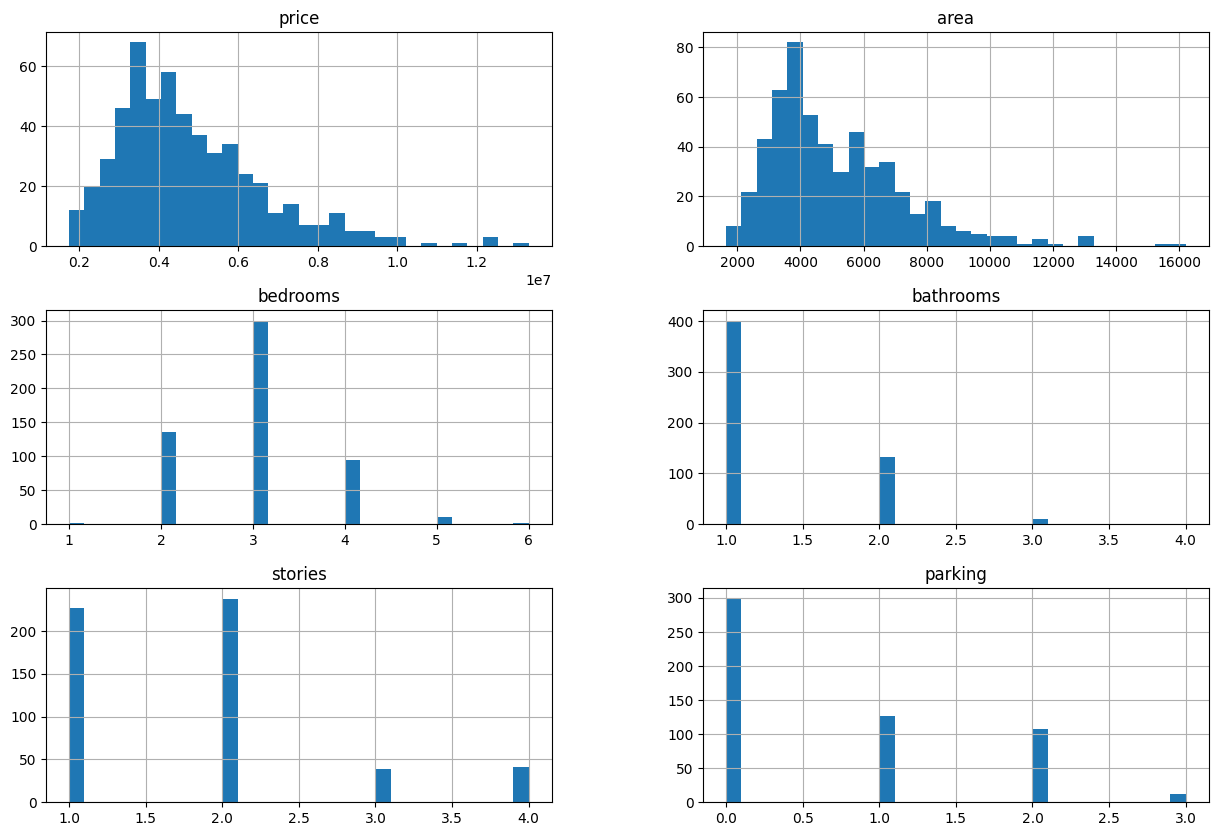

In [13]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Scatter Plot

Here we considered that according to the area and price of the house could be interesting to analize how is the furnishing status behavior.

<Axes: xlabel='area', ylabel='price'>

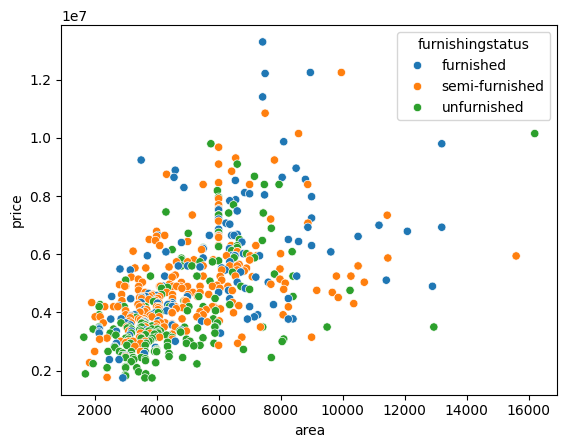

In [14]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

### Heatmap

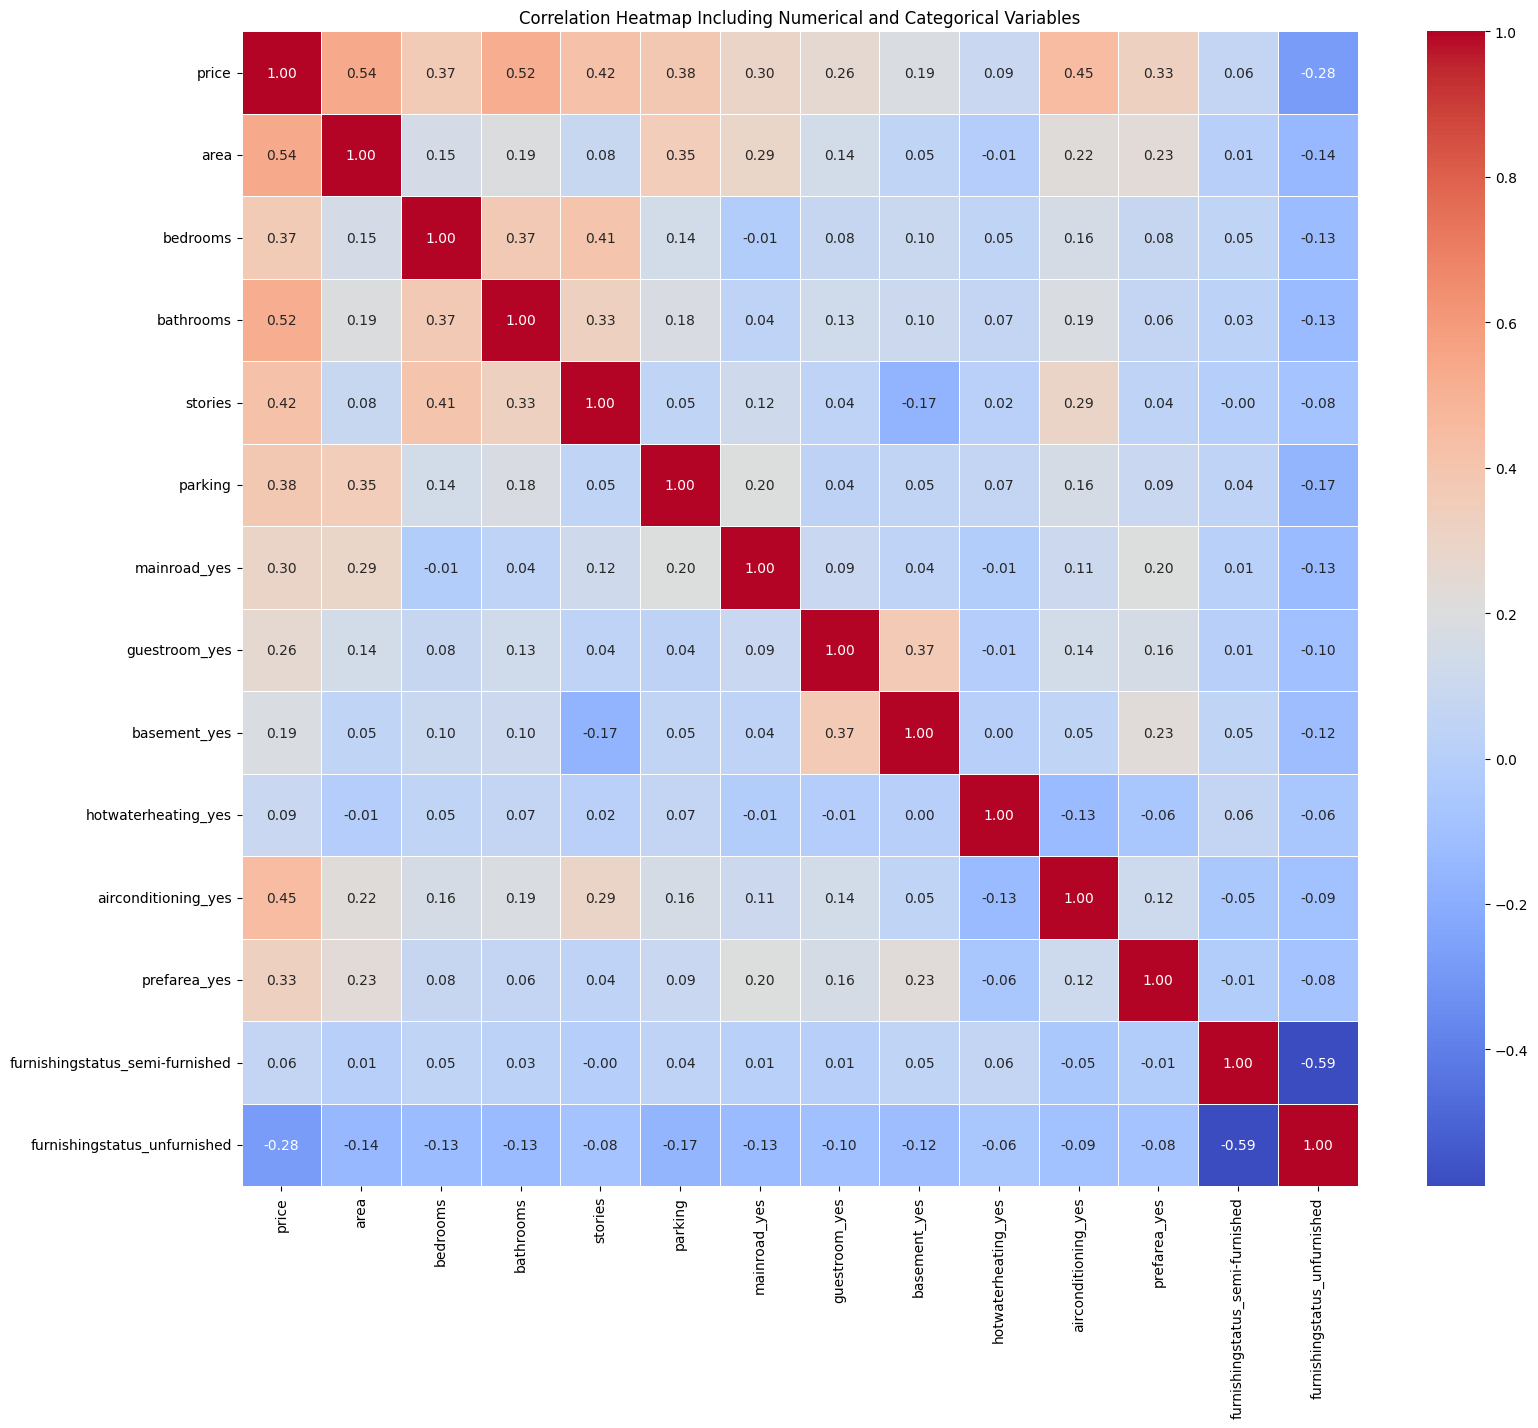

In [15]:
# Convert categorical columns to numerical using One-Hot Encoding to include them in the correlation heatmap
df_encoded = pd.get_dummies(df, columns=categorical_list, drop_first=True)

# Generate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap Including Numerical and Categorical Variables")
plt.show()

### Histograms to understand the distribution of each feature.

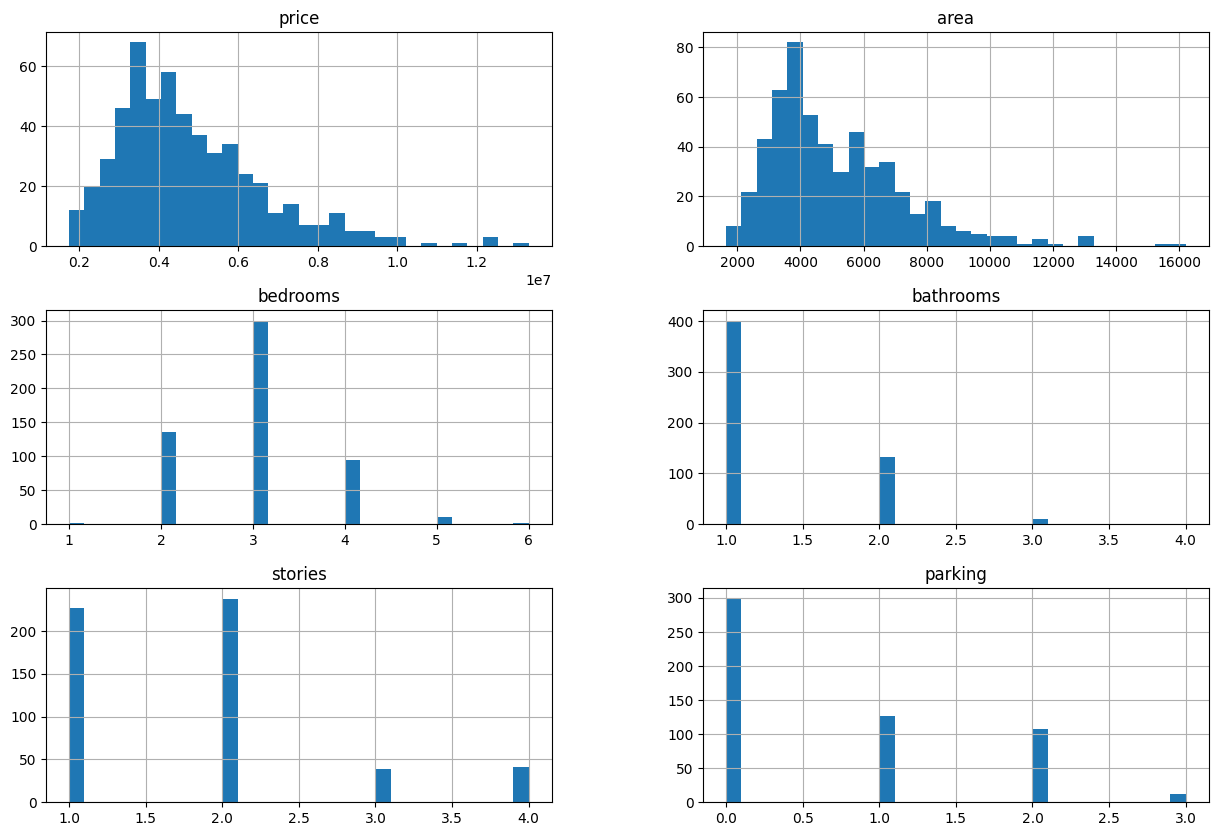

In [16]:
df.hist(bins=30, figsize=(15, 10))
plt.show()


#Handling Missing Data and Outliers

## Outliers

Aplicaremos outliers únicamente sobre las columnas area y price ya que son las que contienen una mayor cantidad de datos diferentes, las demás tienen una cantidad de datos que no alterarán al modelo si ocurren una sola vez.

In [17]:
selected_columns = ['area', 'price']

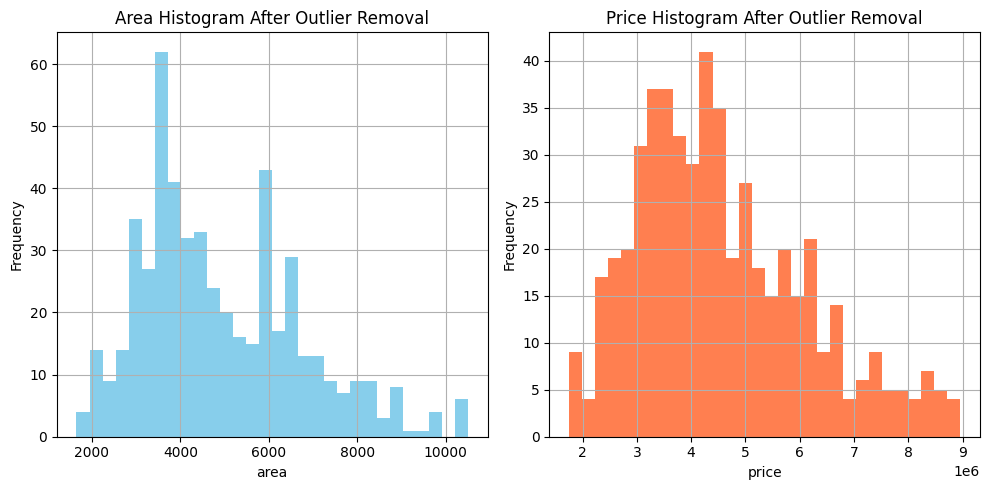

In [18]:
outlied_histogram = df.copy()

# Applying outlier removal only to 'area' and 'price' columns in 'outlied_histogram'
for column in selected_columns:
    Q1 = outlied_histogram[column].quantile(0.25)
    Q3 = outlied_histogram[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtering out outliers only for 'area' and 'price' columns
    outlied_histogram = outlied_histogram[(outlied_histogram[column] >= lower_bound) & (outlied_histogram[column] <= upper_bound)]

# Visualizing the data for 'area' and 'price' with histograms after outlier removal
plt.figure(figsize=(10, 5))

# Histogram for 'area' after outlier removal
plt.subplot(1, 2, 1)
outlied_histogram['area'].hist(bins=30, color='skyblue')
plt.title('Area Histogram After Outlier Removal')
plt.xlabel('area')
plt.ylabel('Frequency')

# Histogram for 'price' after outlier removal
plt.subplot(1, 2, 2)
outlied_histogram['price'].hist(bins=30, color='coral')
plt.title('Price Histogram After Outlier Removal')
plt.xlabel('price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Aquí podemos observar los cambios tras aplicar el outlier comparandolo con el original.

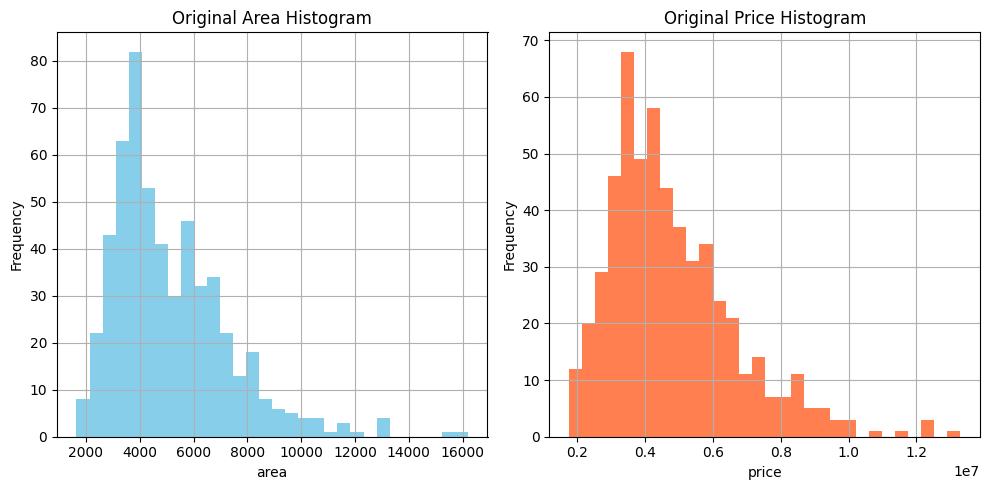

In [19]:
plt.figure(figsize=(10, 5))
# Original 'area' histogram
plt.subplot(1, 2, 1)
df['area'].hist(bins=30, color='skyblue')
plt.title('Original Area Histogram')
plt.xlabel('area')
plt.ylabel('Frequency')

# Original 'price' histogram
plt.subplot(1, 2, 2)
df['price'].hist(bins=30, color='coral')
plt.title('Original Price Histogram')
plt.xlabel('price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## One-hot encoding

Has been handled already during the design of the heatmap. This is the variable `df_encoded`

In [20]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Handling Missing Values


We had no missing values, so we wont't perform this.

# Splitting Data into Training and Testing Sets

In [21]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['price'])  # Replace 'target_column' with actual target
y = df_encoded['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initial model with regression tree

In [22]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 1195266.0550458715
Mean Squared Error (MSE): 2642802637614.6787


### Initial Model with Random Forest

In [25]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=300)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 1010647.3640672783
Mean Squared Error (MSE): 1936604034321.0586


### Gradient Boosting Regressor

In [26]:
gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=3)
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 934492.8526479336
Mean Squared Error (MSE): 1654983865083.489


### XGBoosting Regressor

In [27]:
xgbr_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
xgbr_model.fit(X_train, y_train)
y_pred = xgbr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 945659.9288990826
Mean Squared Error (MSE): 1659521762993.4192


# Model Optimization using Grid Search

In [44]:
results = {}

## Decision Tree

In [46]:
# Parameter grid for tuning
param_grid = {
    'max_depth': [None, 4, 5, 6],
    'min_samples_split': [ 2, 3, 4],
    'min_samples_leaf': [2, 4, 6]
}

# Define the model
dtmodel = DecisionTreeRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dtmodel, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_model = grid_search.best_estimator_

# Make predictions and calculate errors
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

results['Decision Tree'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred)
}

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Absolute Error (MAE): 1207548.5467682374
Mean Squared Error (MSE): 2597777774930.716


## Random Forest

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_rf_model = grid_search.best_estimator_

# Make predictions and calculate errors
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

y_pred_rf = best_rf_model.predict(X_test)
results['Random Forest'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred)
}

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Mean Absolute Error (MAE): 1060888.2022157894
Mean Squared Error (MSE): 2100238627035.312


## Gradient Boosting

In [48]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the Gradient Boosting model
gbr_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_gbr_model = grid_search.best_estimator_

# Make predictions and calculate errors
y_pred = best_gbr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
results['Gradient Boosting'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred)
}

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Absolute Error (MAE): 1021239.9130632366
Mean Squared Error (MSE): 1837880236051.8044


## XGBoost

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the XGBoost model
xgbr_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_xgb_model = grid_search.best_estimator_

# Make predictions and calculate errors
y_pred = best_xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

results['XGBoost'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred)
}

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Absolute Error (MAE): 1017440.8990825688
Mean Squared Error (MSE): 1863070425529.4495


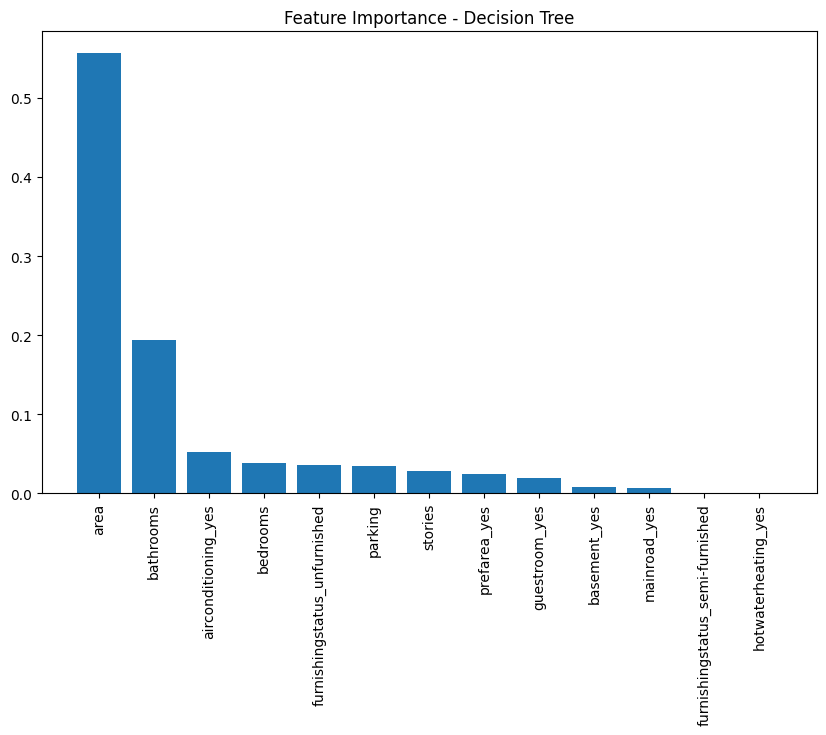

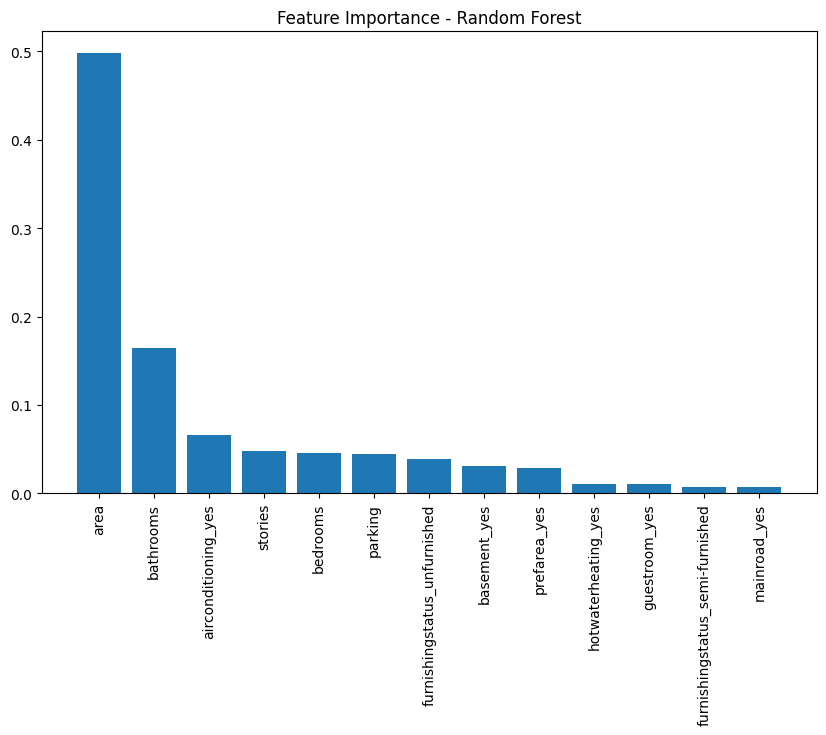

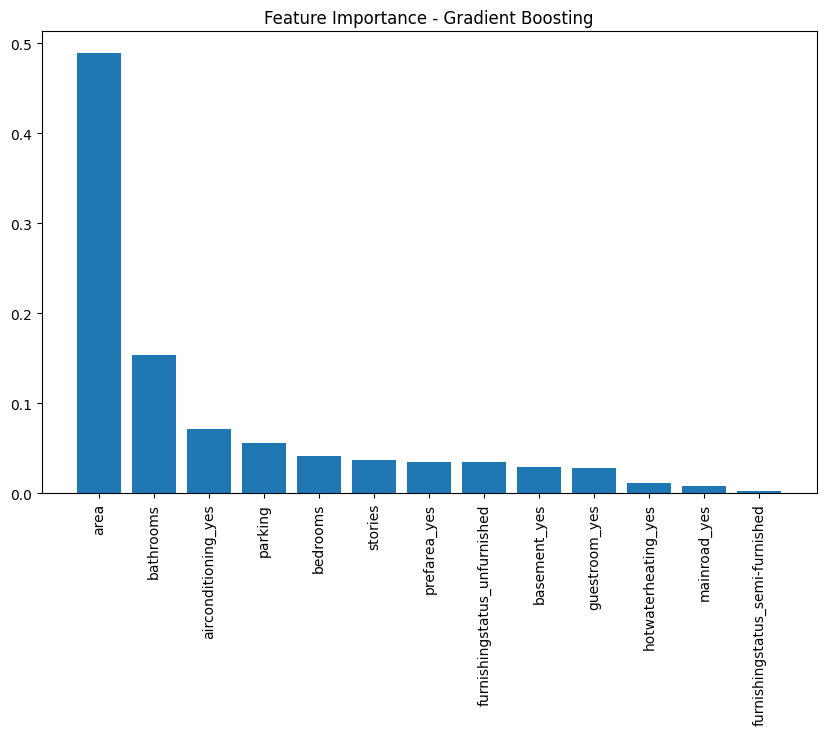

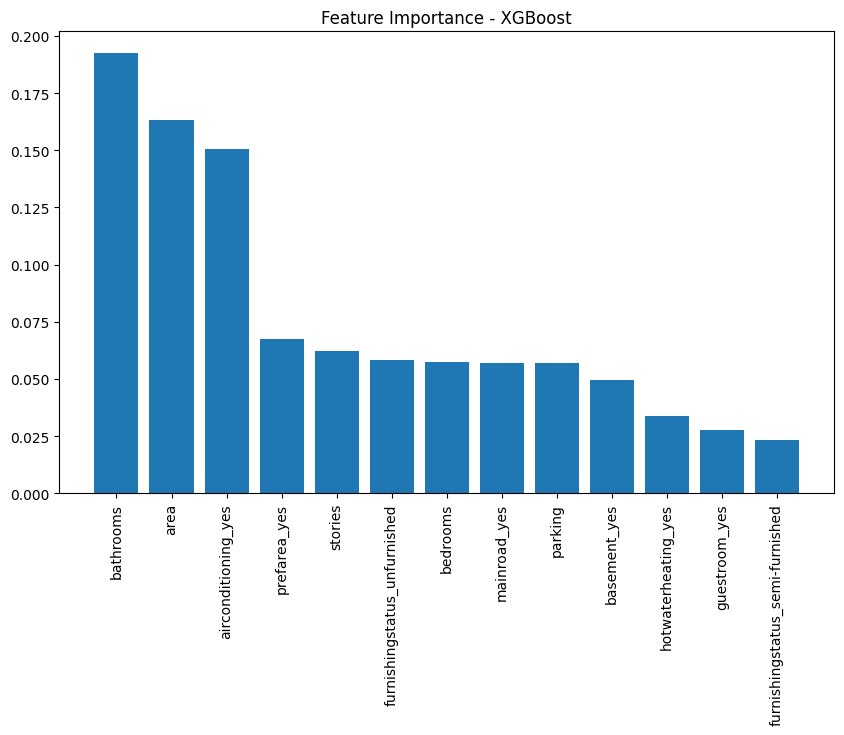

Sorted Results:
               Model       MAE               MSE
3            XGBoost 1,017,441 1,863,070,425,529
2  Gradient Boosting 1,021,240 1,837,880,236,052
1      Random Forest 1,060,888 2,100,238,627,035
0      Decision Tree 1,207,549 2,597,777,774,931


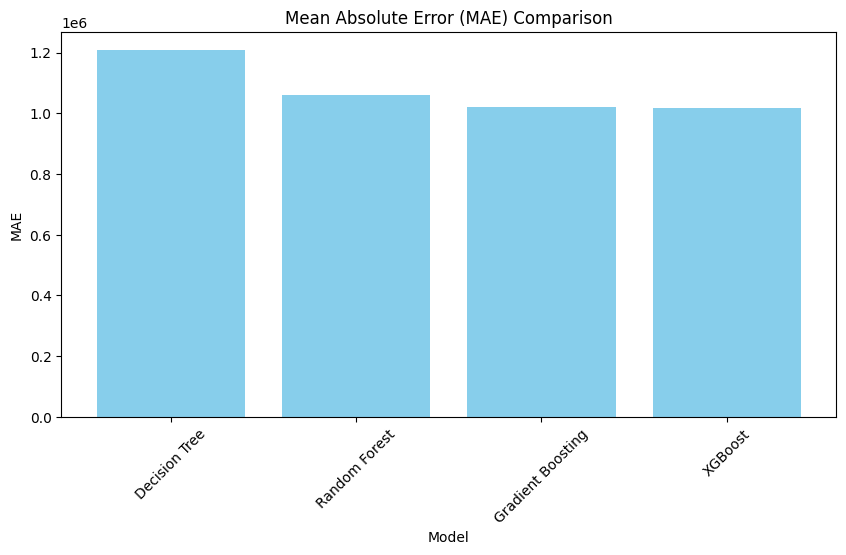

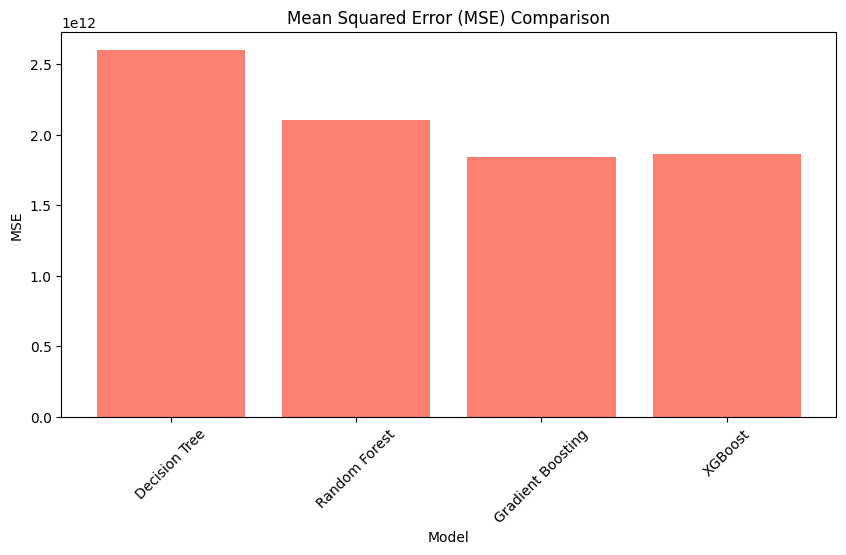

In [68]:
from matplotlib.ticker import ScalarFormatter
import numpy as np

def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]  # Sort features by importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[indices], align='center')
    plt.xticks(range(len(importance)), np.array(feature_names)[indices], rotation=90)
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
results_df = results_df.round({'MAE': 0})
results_df = results_df.round({'MSE': 0})
pd.options.display.float_format = '{:,.0f}'.format
# Assuming X_train.columns contains the feature names
feature_names = X_train.columns

# Plot feature importance for each model
plot_feature_importance(best_model, "Decision Tree", feature_names)       # Decision Tree
plot_feature_importance(best_rf_model, "Random Forest", feature_names)    # Random Forest
plot_feature_importance(best_gbr_model, "Gradient Boosting", feature_names)  # Gradient Boosting
plot_feature_importance(best_xgb_model, "XGBoost", feature_names)         # XGBoost


# Sort the DataFrame by MAE in ascending order
results_df_sorted = results_df.sort_values(by="MAE")
print("Sorted Results:")
print(results_df_sorted)




# Plot MAE for each model
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['MAE'].astype(int), color='skyblue')
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.show()

# Plot MSE for each model
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['MSE'].astype(int), color='salmon')
plt.title("Mean Squared Error (MSE) Comparison")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.show()